In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tarfile
from pathlib import Path
from statistics import median
import csv
import os
import scipy.io
import scanpy as sc

In [ ]:
DATA = Path('/content/drive/My Drive/Genomics')

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.8.2 leidenalg==0.8.1


# Part 1. Load data

In [ ]:
filename = DATA/"pbmc4k_filtered_gene_bc_matrices.tar.gz"
tf = tarfile.open(filename)
tf.extractall()

In [ ]:
tf.getmembers()

[<TarInfo 'filtered_gene_bc_matrices' at 0x7fa020bee110>,
 <TarInfo 'filtered_gene_bc_matrices/GRCh38' at 0x7fa020bee368>,
 <TarInfo 'filtered_gene_bc_matrices/GRCh38/barcodes.tsv' at 0x7fa020bee430>,
 <TarInfo 'filtered_gene_bc_matrices/GRCh38/matrix.mtx' at 0x7fa020bee2a0>,
 <TarInfo 'filtered_gene_bc_matrices/GRCh38/genes.tsv' at 0x7fa020bee4f8>]

In [ ]:
matrix_dir = "/content/filtered_gene_bc_matrices/GRCh38"
mat = scipy.io.mmread(os.path.join(matrix_dir, "matrix.mtx"))

genes_path = os.path.join(matrix_dir, "genes.tsv")
genes = pd.read_csv(genes_path, sep='\t', header=None, 
                    names=['ENSG', 'genes'], index_col=['genes'])

barcodes_path = os.path.join(matrix_dir, "barcodes.tsv")
barcodes = pd.read_csv(barcodes_path, sep='\t', header=None, 
                       names=['cells'], index_col=['cells'])

In [ ]:
mat

<33694x4340 sparse matrix of type '<class 'numpy.int64'>'
	with 5727695 stored elements in COOrdinate format>

In [ ]:
genes

,ENSG
genes,
RP11-34P13.3,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC233755.2,ENSG00000277856
AC233755.1,ENSG00000275063
AC240274.1,ENSG00000271254


In [ ]:
barcodes

""
cells
AAACCTGAGAAGGCCT-1
AAACCTGAGACAGACC-1
AAACCTGAGATAGTCA-1
AAACCTGAGCGCCTCA-1
AAACCTGAGGCATGGT-1
...
TTTGGTTTCGCTAGCG-1
TTTGTCACACTTAACG-1
TTTGTCACAGGTCCAC-1


## 1a. Change to dense format

In [ ]:
dense = mat.todense()
dense  # matrix in dense format

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
dense.shape

(33694, 4340)

In [ ]:
genes.index.nunique()

33660

The shape of the dense-format matrix is 33694 by 4340, which means 33694 genes and 4340 cells are detected.

Notice that, in 'filtered_gene_bc_matrices/GRCh38/genes.tsv', some of genes are the same genes with different ENSEMBL ids. This is likely because these are small non-coding RNAs. So different ENSEMBL ids mean that the loci are different, but they are the same genes. With this consideration, the actual number of genes are 33660.

## 1b. Histogram of the library size

In [ ]:
ls = np.sum(dense, axis=0)  # library size
ls.shape

(1, 4340)

(3.1, 4.7, 0.0, 355.0)

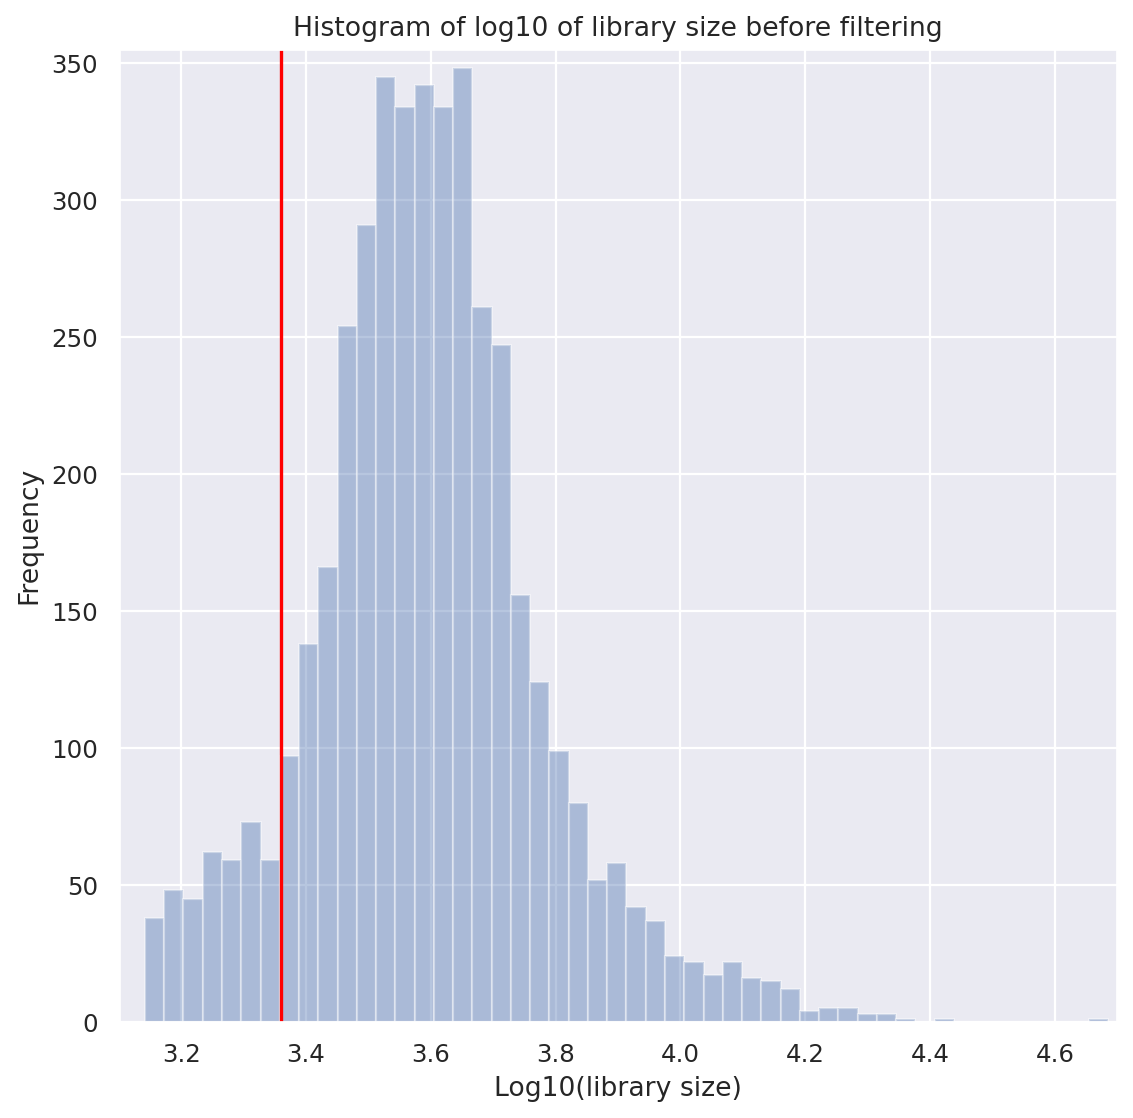

In [ ]:
sc.settings.set_figure_params(dpi=80)
sns.set(color_codes=True)

plt.figure(figsize=(8, 8))
sns.distplot(np.log10(ls), kde=False, axlabel='Log10(library size)')
plt.title('Histogram of log10 of library size before filtering')
plt.ylabel('Frequency')

# Draw the threshold line for filtering out the lower mmode as noisy genes
threshold_cells = 3.36
plt.vlines(threshold_cells, 0, 355, colors='red', linestyles='solid') 

plt.axis([3.1, 4.7, 0, 355])  # set a range for the plot

Convert matrix to AnnData First. **Notice Anndata obs are cells, var is genes. So, Anndata is the transpose of the original matrix.**

In [ ]:
adata = sc.AnnData(dense.transpose(), 
                   obs=barcodes, 
                   var=genes)

In [ ]:
adata

AnnData object with n_obs × n_vars = 4340 × 33694
    var: 'ENSG'

In [ ]:
# Filter out cells with very low counts in case they are empty droplets
sc.pp.filter_cells(adata, min_counts=10**threshold_cells)

In [ ]:
adata

AnnData object with n_obs × n_vars = 3949 × 33694
    obs: 'n_counts'
    var: 'ENSG'

Text(0, 0.5, 'Frequency')

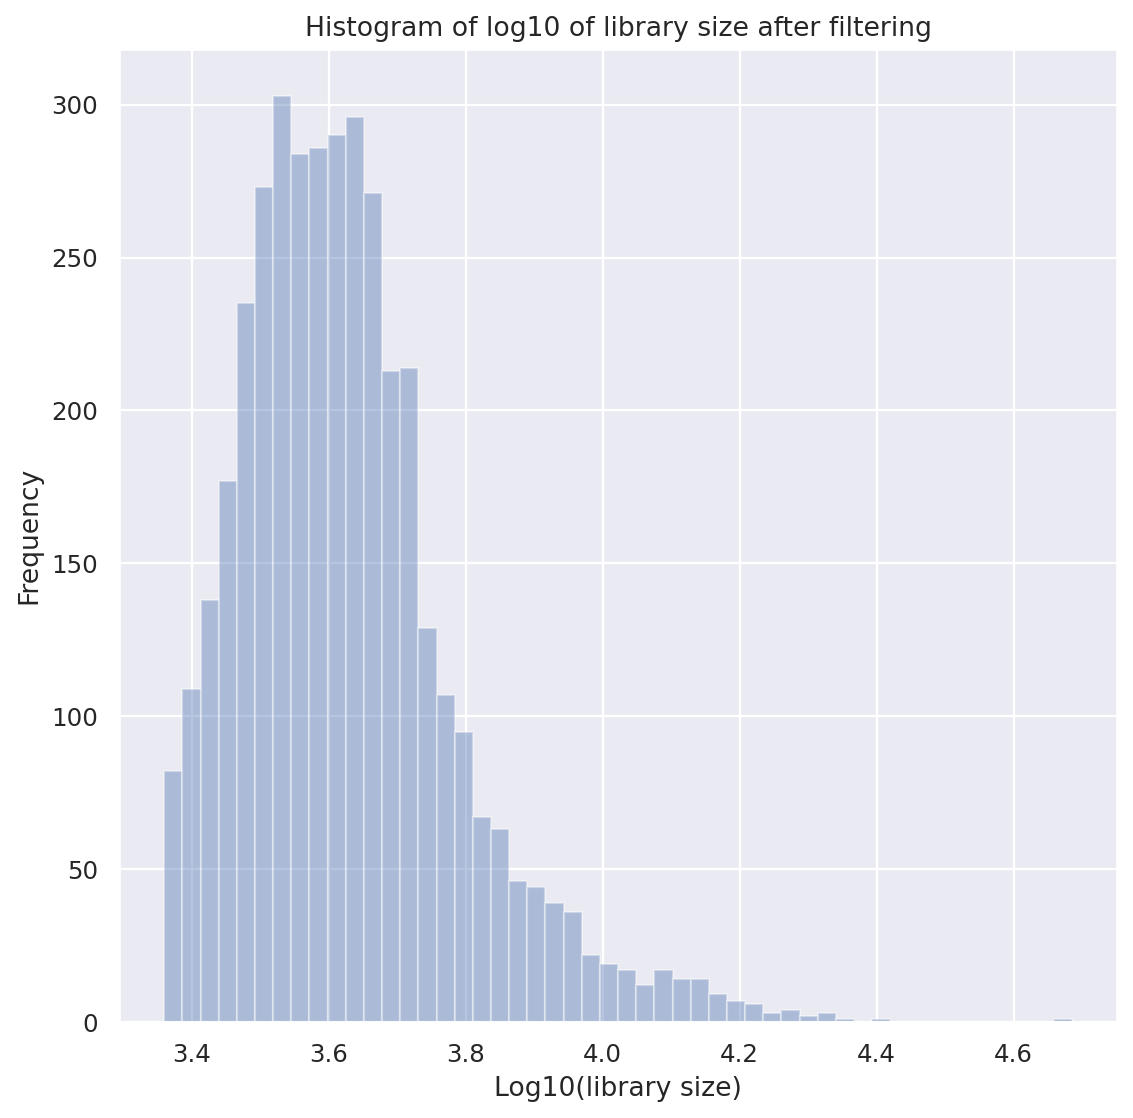

In [ ]:
plt.figure(figsize=(8, 8))
sns.distplot(np.log10(adata.obs.n_counts), kde=False, axlabel='Log10(library size)')
plt.title('Histogram of log10 of library size after filtering')
plt.ylabel('Frequency')

In [ ]:
median_ls = median(np.array(adata.obs.n_counts).flatten())  # 'ls' stands for library size
median_ls

4042.0

It is necessary to filter out cells with very low counts. These might be empty droplets. 

The median of the library size across all cells after filtering is 4042. 

## 1c. Histogram of the number of cells in which each gene is expressed 

In [ ]:
# get the dense matrix filtered in 1b
dense_filtered = dense[: , np.array(np.where(barcodes.index.isin(adata.obs.index))).flatten()]
dense_filtered.shape

(33694, 3949)

In [ ]:
num_cells = np.sum(np.where(dense_filtered>0, True, False), 
                   axis=1)
# Add 1 to those genes that are expressed in 0 cells for log calculation
num_cells[num_cells==0] = 1  
num_cells.shape

(33694,)

(-0.5, 4.5, 0.0, 1.3)

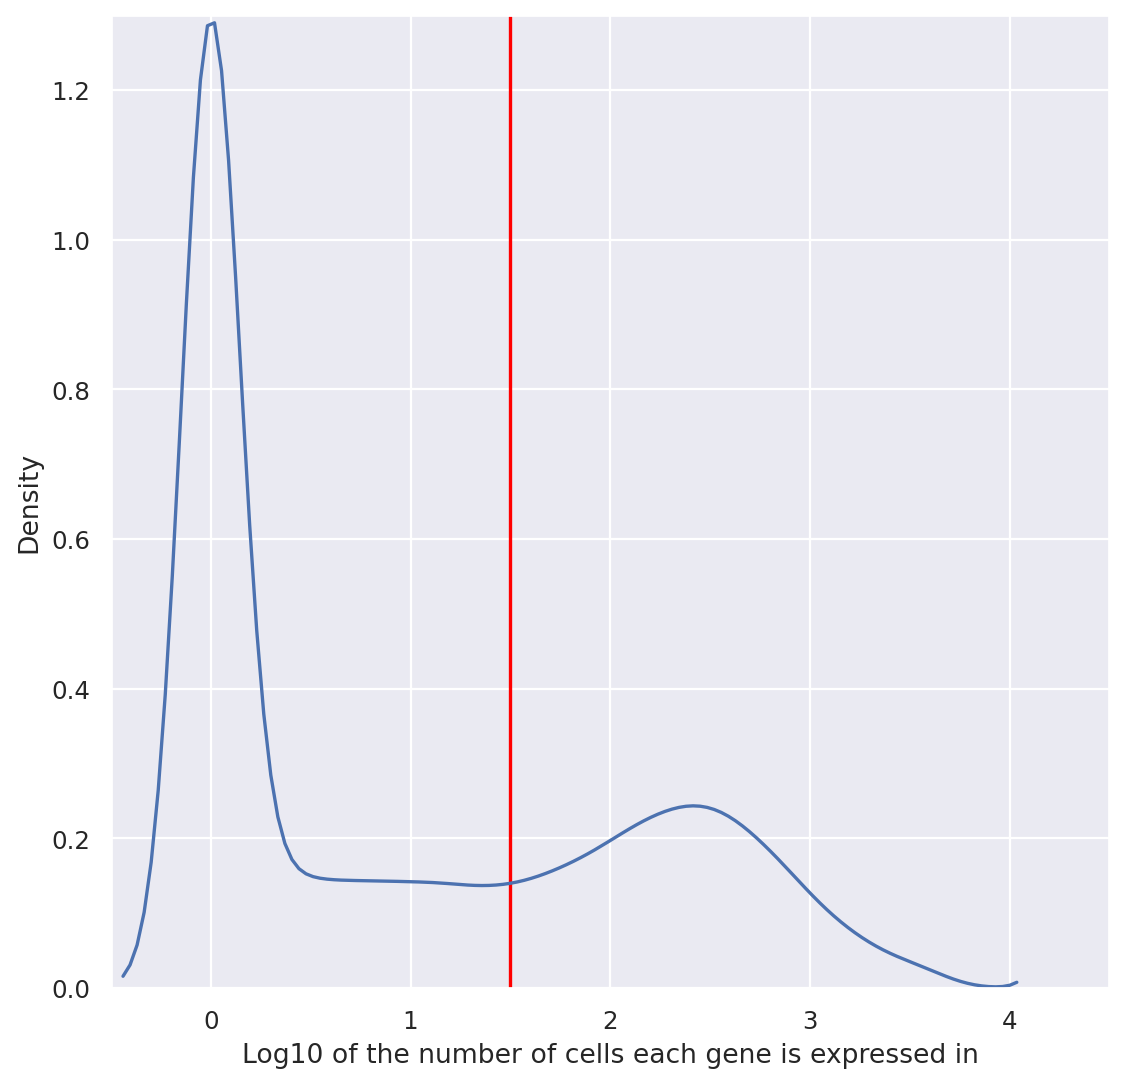

In [ ]:
plt.figure(figsize=(8, 8))
sns.distplot(np.log10(num_cells), hist=False, 
             axlabel='Log10 of the number of cells each gene is expressed in')
plt.ylabel('Density')

# Draw the threshold line for filtering out the lower mode as noisy genes
threshold_genes = 1.5
plt.vlines(threshold_genes, 0, 1.3, colors='red', linestyles='solid') 
plt.axis([-0.5, 4.5, 0, 1.3])

In [ ]:
sc.pp.filter_genes(adata, min_cells=10**threshold_genes)

In [ ]:
adata

AnnData object with n_obs × n_vars = 3949 × 11310
    obs: 'n_counts'
    var: 'ENSG', 'n_cells'

In [ ]:
adata.var_names.nunique()

11308

The distribution is multimodal. If we filter the lower mode as noisy genes, there are 11310 genes left. 

(Notice the AnnData format has to be the transpose of the origial matrix.)

If we consider the discussion in 1a in terms of unique gene names, there are 11308 genes.

# Part 2

## 2a. Global scaling

In [ ]:
# Make sure to use correct data to start with
adata = sc.AnnData(dense.transpose(), 
                   obs=barcodes, 
                   var=genes)

print("Number of var_names before making unique:", adata.var_names.nunique())
adata.var_names_make_unique()
print("Number of var_names after making unique:", adata.var_names.nunique())

sc.pp.filter_cells(adata, min_counts=10**threshold_cells)
sc.pp.filter_genes(adata, min_cells=10**threshold_genes)
adata

In [ ]:
# Global normalization
sc.pp.normalize_total(adata, target_sum=median_ls)

normalizing counts per cell
    finished (0:00:00)


In [ ]:
# Double check the normalization result - each cell should have total counts = median_ls
adata.X.sum(axis=1)

array([4042.    , 4042.0002, 4042.    , ..., 4041.9998, 4042.    ,
       4042.0002], dtype=float32)

## 2b. Dimensionality reduction

computing PCA
    with n_comps=50
    finished (0:00:10)


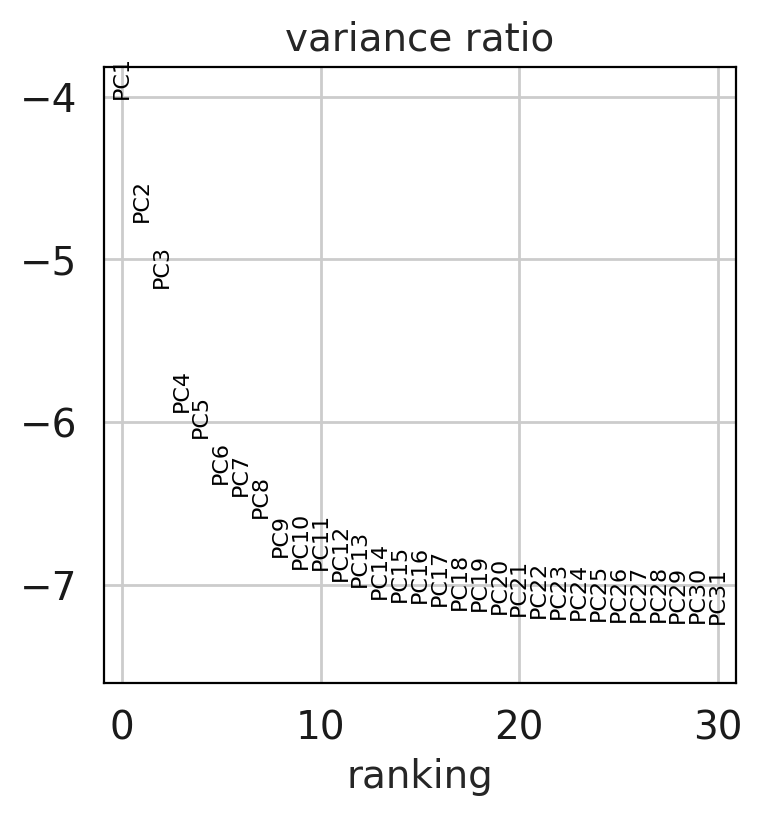

In [ ]:
sc.settings.set_figure_params(dpi=100)

# remove highly variable genes
sc.pp.scale(adata, max_value=10)

# Use PCA to decide the number of principle components in Umap
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, log=True)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


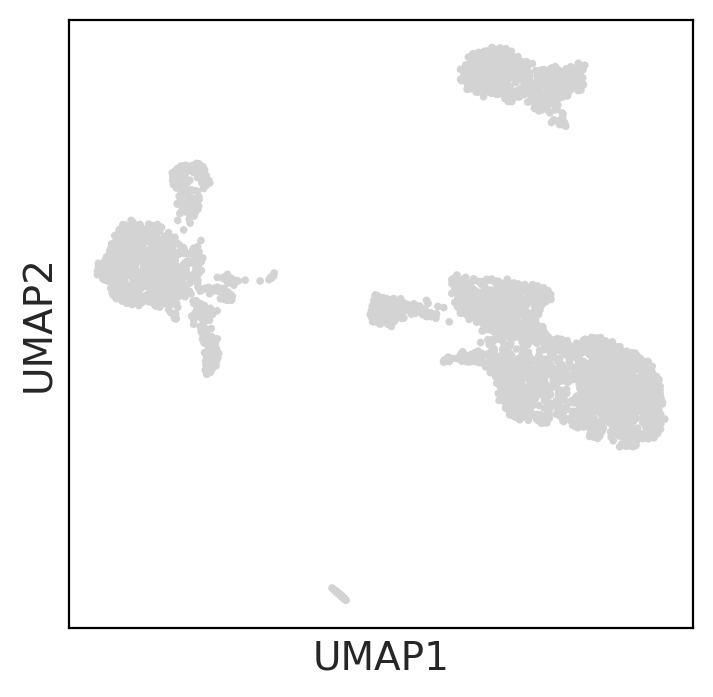

In [ ]:
# Based on the figures above, choose the number of principle components
sc.pp.neighbors(adata, n_pcs=20)
sc.tl.umap(adata)
sc.pl.umap(adata)

I chose Umap. 

Umap preserves local data structure and also more of the global data structure than t-SNE. 

It runs with a shorter run time. It is suitable to be directly applied to sparse data without needing an additional pre-processing step. 

Since in the previous step, the glocal scaling could remove some stochasticity specific to cell types, Umap may help seperate them better. 

## 2c. Coloring by log10(original library sizes)

In [ ]:
adata.obs['log10n_counts'] = np.log10(adata.obs.n_counts)
adata.obs

,n_counts,log10n_counts
cells,,
AAACCTGAGACAGACC-1,3240.0,3.510545
AAACCTGAGCGCCTCA-1,2319.0,3.365301
AAACCTGAGGCATGGT-1,2983.0,3.474653
AAACCTGCAAGGTTCT-1,4181.0,3.621280
AAACCTGCAGGATTGG-1,2691.0,3.429914
...,...,...
TTTGGTTTCGCTAGCG-1,6514.0,3.813848
TTTGTCACACTTAACG-1,3293.0,3.517592
TTTGTCACAGGTCCAC-1,8322.0,3.920228


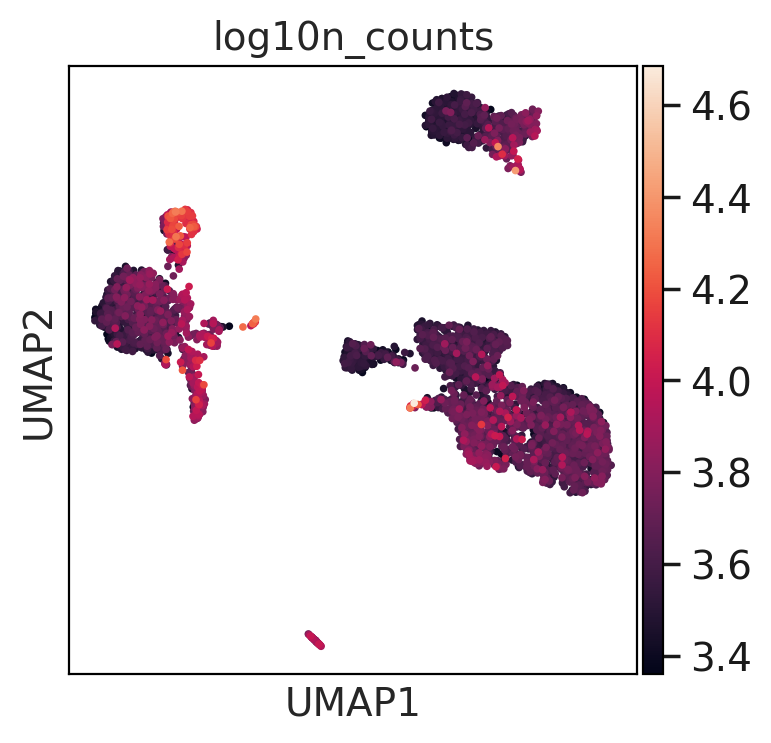

In [ ]:
sc.pl.umap(adata, color='log10n_counts')

The interpretation of this plot is that the effect of library size has been corrected by normalization so there is no major variation between different cells. 

## 2d. Major immune cell markers

In [ ]:
sc.tl.leiden(adata)
adata.obs

running Leiden clustering
    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


,n_counts,log10n_counts,leiden
cells,,,
AAACCTGAGACAGACC-1,3240.0,3.510545,0
AAACCTGAGCGCCTCA-1,2319.0,3.365301,3
AAACCTGAGGCATGGT-1,2983.0,3.474653,4
AAACCTGCAAGGTTCT-1,4181.0,3.621280,4
AAACCTGCAGGATTGG-1,2691.0,3.429914,12
...,...,...,...
TTTGGTTTCGCTAGCG-1,6514.0,3.813848,0
TTTGTCACACTTAACG-1,3293.0,3.517592,2
TTTGTCACAGGTCCAC-1,8322.0,3.920228,2


In [ ]:
adata.obs.leiden

cells
AAACCTGAGACAGACC-1     0
AAACCTGAGCGCCTCA-1     3
AAACCTGAGGCATGGT-1     4
AAACCTGCAAGGTTCT-1     4
AAACCTGCAGGATTGG-1    12
                      ..
TTTGGTTTCGCTAGCG-1     0
TTTGTCACACTTAACG-1     2
TTTGTCACAGGTCCAC-1     2
TTTGTCAGTTAAGACA-1     5
TTTGTCATCCCAAGAT-1     0
Name: leiden, Length: 3949, dtype: category
Categories (14, object): [0, 1, 2, 3, ..., 10, 11, 12, 13]

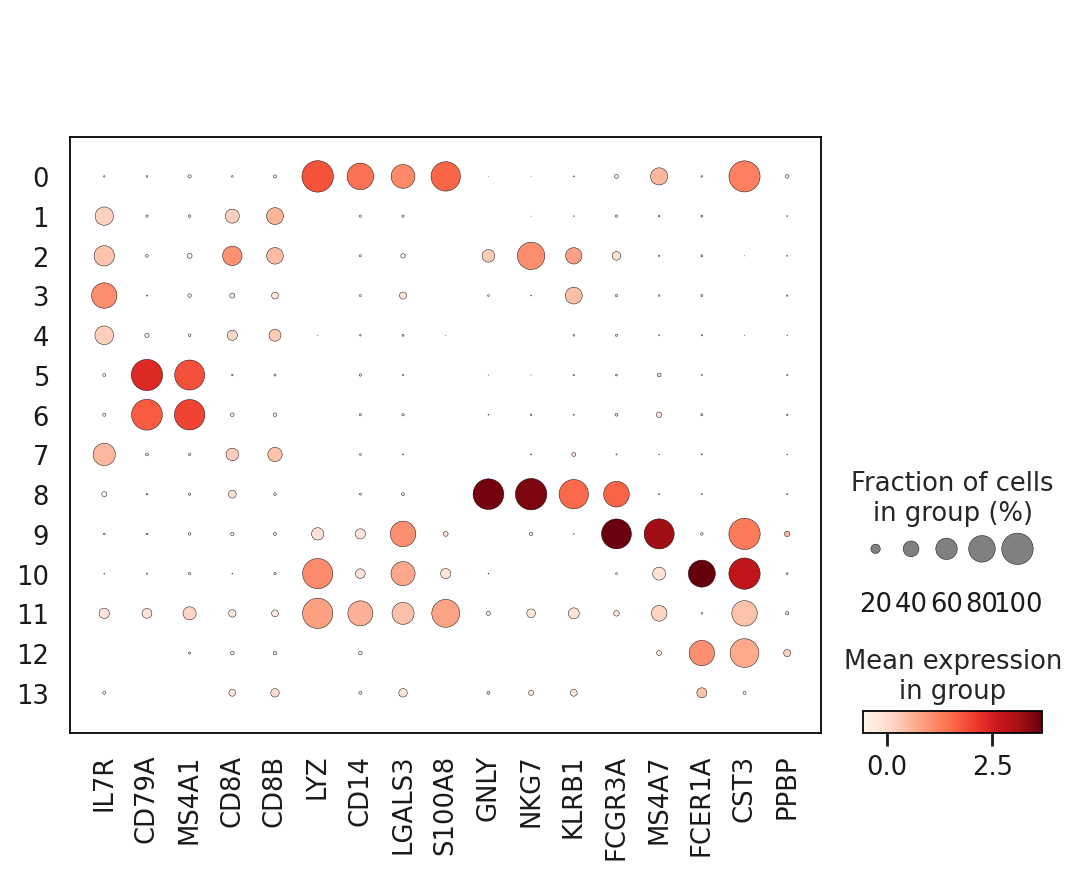

In [ ]:
# Decide what marker genes to be marked for each cluster
sc.settings.set_figure_params(dpi=80)
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

ax = sc.pl.dotplot(adata, marker_genes, groupby='leiden')

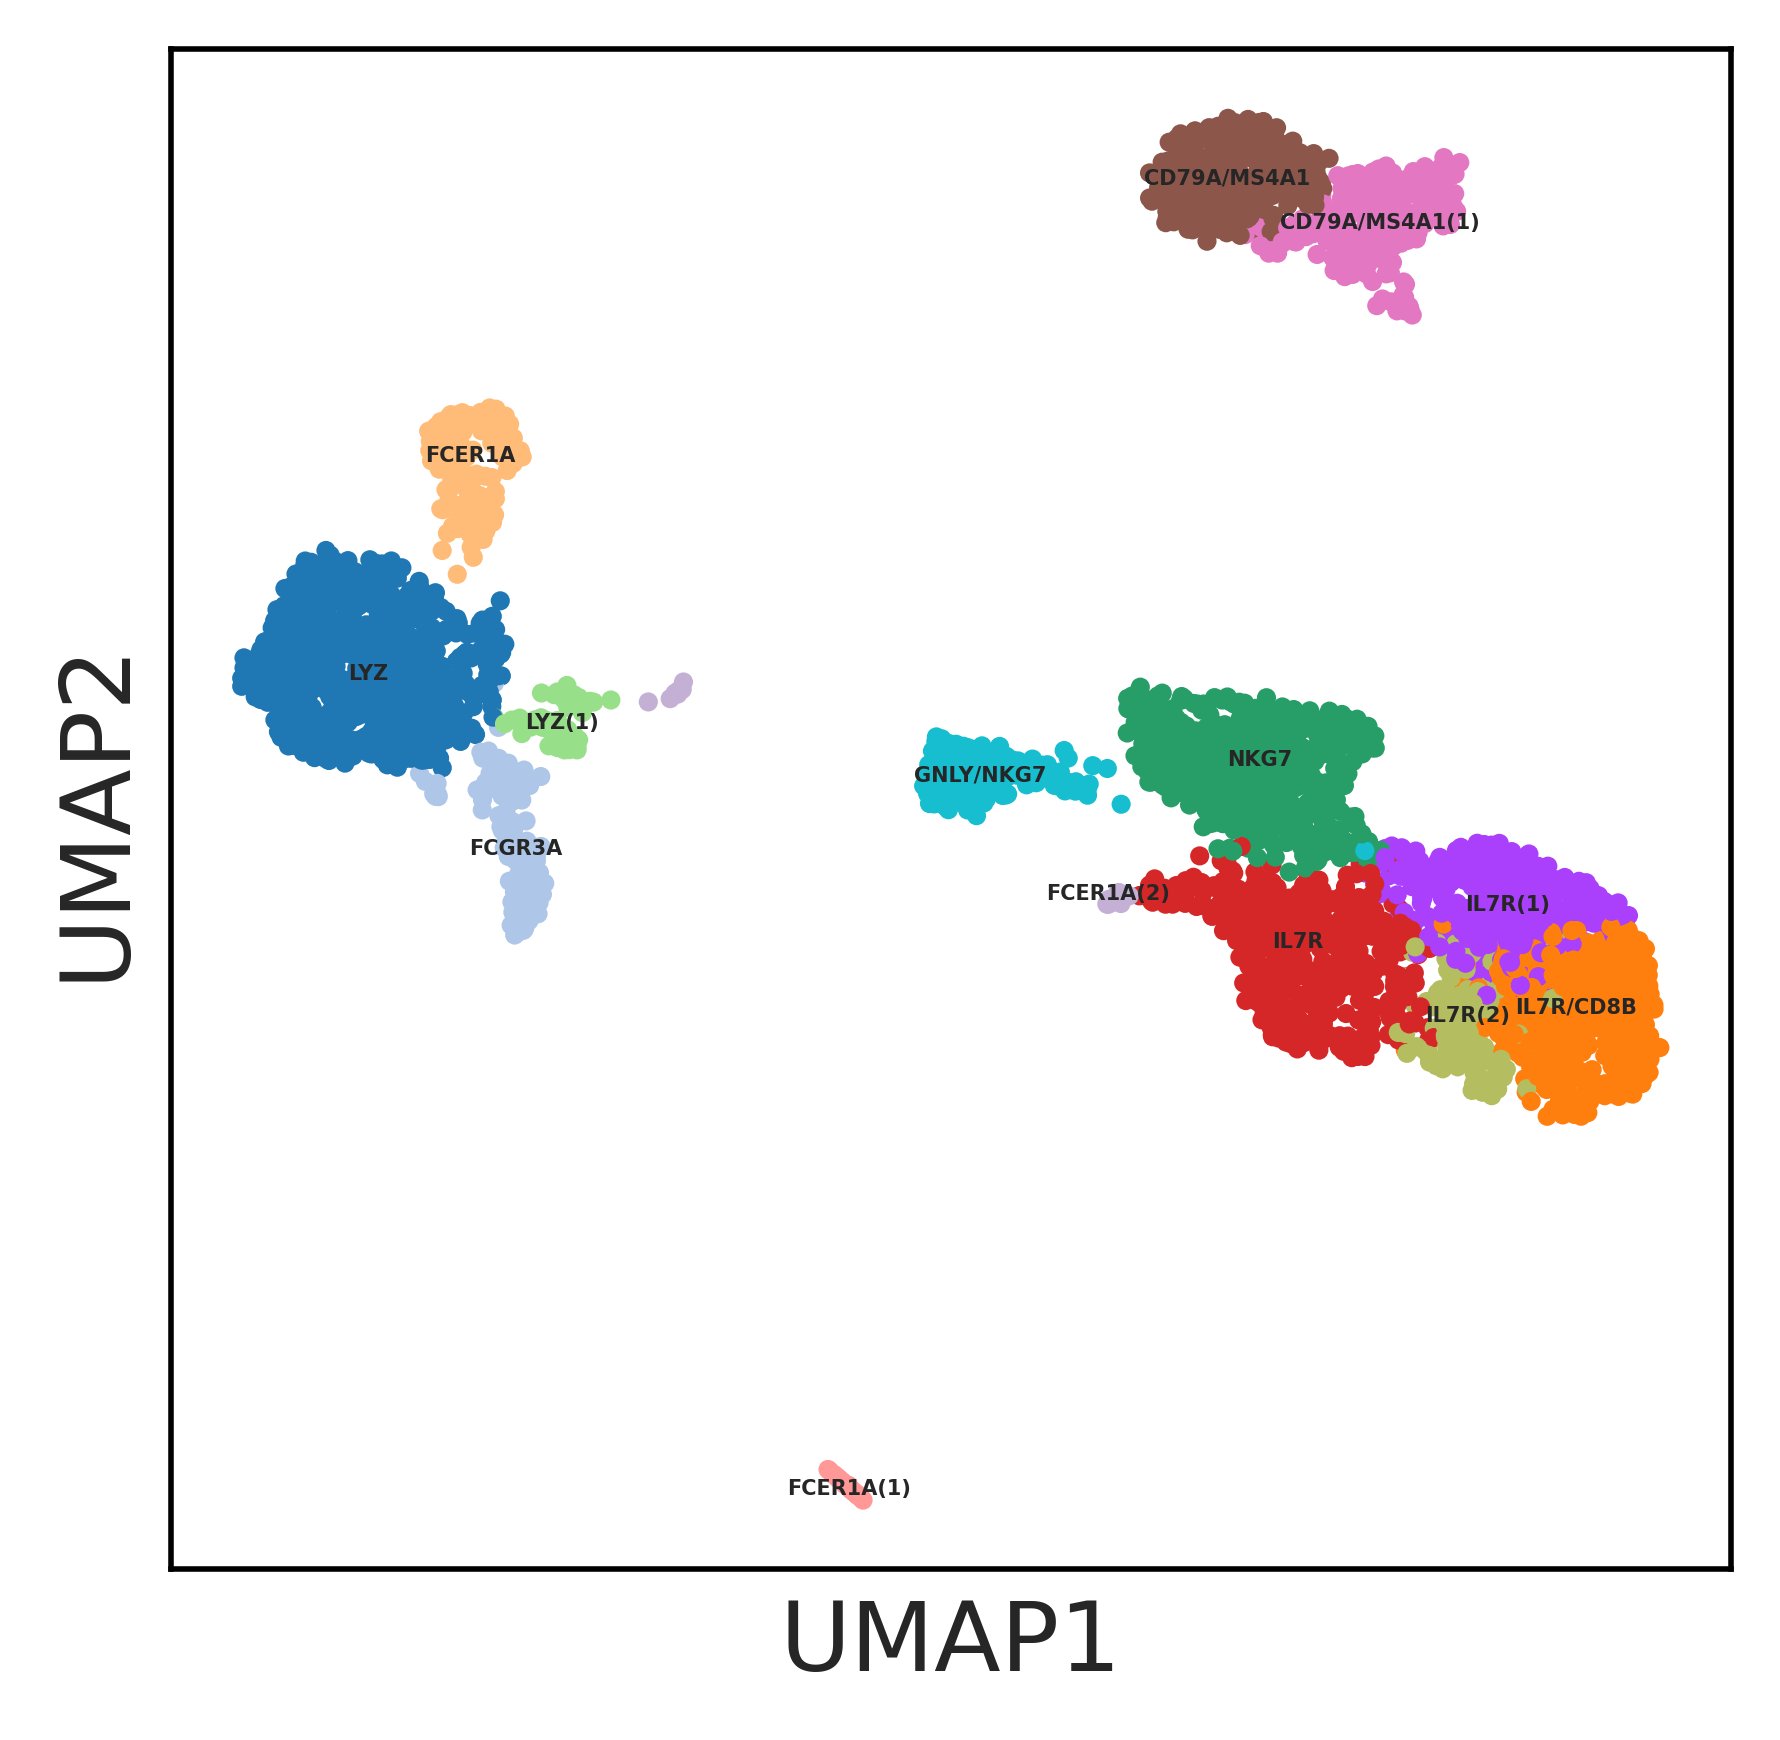

In [ ]:
cluster_names = ['LYZ',
                'IL7R/CD8B',
                'NKG7',
                'IL7R',
                'IL7R(1)',
                'CD79A/MS4A1',
                'CD79A/MS4A1(1)',
                'IL7R(2)',
                'GNLY/NKG7',
                'FCGR3A',
                'FCER1A',
                'LYZ(1)',
                'FCER1A(1)',
                'FCER1A(2)'
                ]

adata.rename_categories('leiden', cluster_names)

sc.settings.set_figure_params(dpi=250)
sc.pl.umap(adata, color='leiden', legend_loc='on data', 
           title='', legend_fontsize=3)

In this map, we can see **B lymphocytes** with marker CD79A and MS4A1. There are also **macrophages** with LYZ, FCGR1A and FCGR3A. Additionaly, there are **T lymphocytes** with IL7R and CD8B. Close to this cluster, there are some **NK cells** with NKG7.

# Part 3. Regress out the library size

In [ ]:
# Reset adata for part3
adata = sc.AnnData(dense.transpose(), 
                   obs=barcodes, 
                   var=genes)

print("Number of var_names before making unique:", adata.var_names.nunique())
adata.var_names_make_unique()
print("Number of var_names after making unique:", adata.var_names.nunique())

sc.pp.filter_cells(adata, min_counts=10**threshold_cells)
sc.pp.filter_genes(adata, min_cells=10**threshold_genes)
adata

In [ ]:
sc.pp.normalize_total(adata, target_sum=median_ls)
adata.X.sum(axis=1)

normalizing counts per cell
    finished (0:00:00)


array([4042.    , 4042.0002, 4042.    , ..., 4041.9998, 4042.    ,
       4042.0002], dtype=float32)

In [ ]:
# Regress out the library size
sc.pp.regress_out(adata, ['n_counts'])

regressing out ['n_counts']
    finished (0:00:57)


computing PCA
    with n_comps=50
    finished (0:00:10)


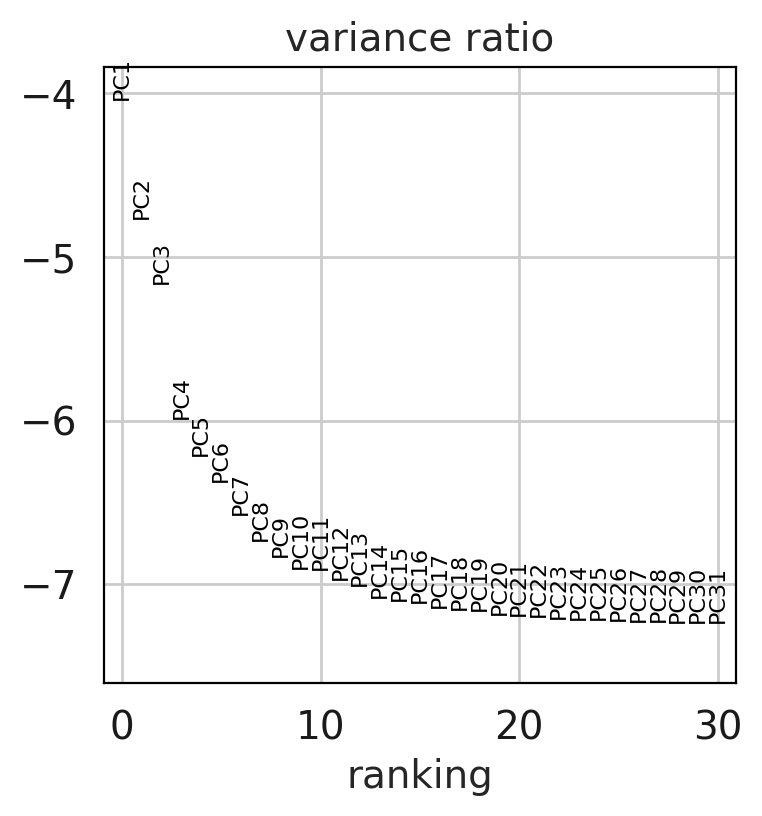

In [ ]:
# Reset dpi for the following figures
sc.settings.set_figure_params(dpi=100) 

# Remove highly variable genes
sc.pp.scale(adata, max_value=10)

# Use PCA to dicide the number of principle components in Umap
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, log=True)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


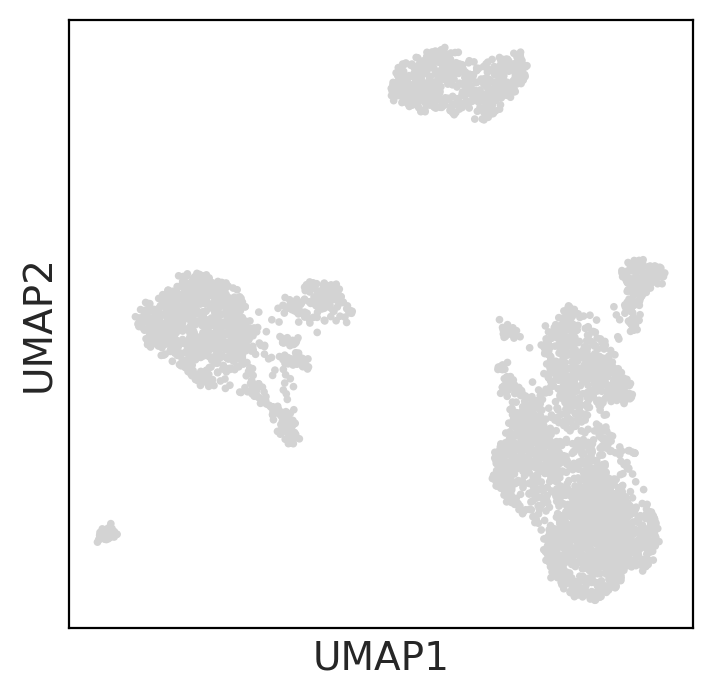

In [ ]:
sc.pp.neighbors(adata, n_pcs=20)
sc.tl.umap(adata)
sc.pl.umap(adata)

In [ ]:
adata.obs['log10n_counts'] = np.log10(adata.obs.n_counts)
adata.obs

,n_counts,log10n_counts
cells,,
AAACCTGAGACAGACC-1,3240.0,3.510545
AAACCTGAGCGCCTCA-1,2319.0,3.365301
AAACCTGAGGCATGGT-1,2983.0,3.474653
AAACCTGCAAGGTTCT-1,4181.0,3.621280
AAACCTGCAGGATTGG-1,2691.0,3.429914
...,...,...
TTTGGTTTCGCTAGCG-1,6514.0,3.813848
TTTGTCACACTTAACG-1,3293.0,3.517592
TTTGTCACAGGTCCAC-1,8322.0,3.920228


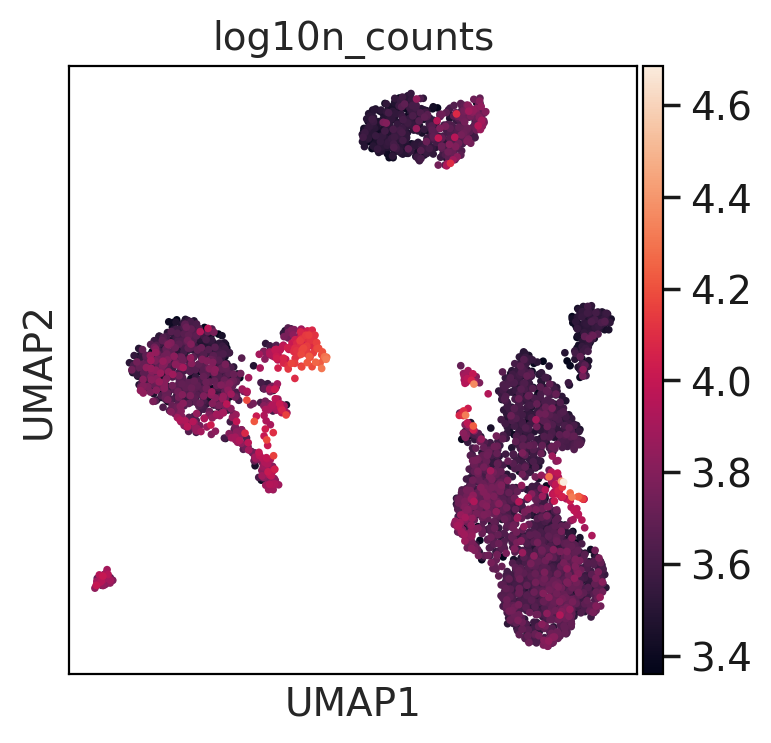

In [ ]:
sc.pl.umap(adata, color='log10n_counts')

The interpretation of this plot is that the effect of library size has been corrected so there is no major variation between different cells.

In [ ]:
sc.tl.leiden(adata)
adata.obs

running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


,n_counts,log10n_counts,leiden
cells,,,
AAACCTGAGACAGACC-1,3240.0,3.510545,3
AAACCTGAGCGCCTCA-1,2319.0,3.365301,1
AAACCTGAGGCATGGT-1,2983.0,3.474653,4
AAACCTGCAAGGTTCT-1,4181.0,3.621280,4
AAACCTGCAGGATTGG-1,2691.0,3.429914,14
...,...,...,...
TTTGGTTTCGCTAGCG-1,6514.0,3.813848,3
TTTGTCACACTTAACG-1,3293.0,3.517592,2
TTTGTCACAGGTCCAC-1,8322.0,3.920228,12


In [ ]:
adata.obs.leiden

cells
AAACCTGAGACAGACC-1     3
AAACCTGAGCGCCTCA-1     1
AAACCTGAGGCATGGT-1     4
AAACCTGCAAGGTTCT-1     4
AAACCTGCAGGATTGG-1    14
                      ..
TTTGGTTTCGCTAGCG-1     3
TTTGTCACACTTAACG-1     2
TTTGTCACAGGTCCAC-1    12
TTTGTCAGTTAAGACA-1     5
TTTGTCATCCCAAGAT-1     3
Name: leiden, Length: 3949, dtype: category
Categories (15, object): [0, 1, 2, 3, ..., 11, 12, 13, 14]

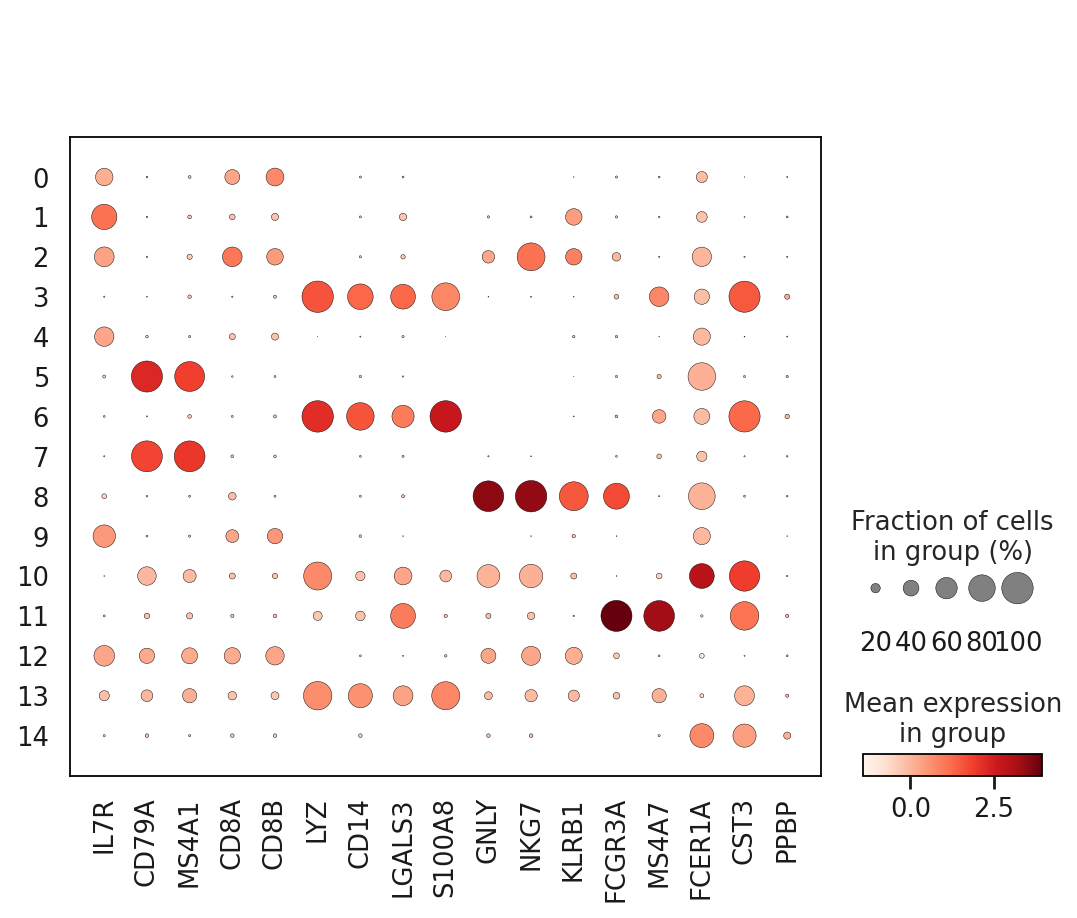

In [ ]:
# Decide what marker genes to be marked for each cluster
sc.settings.set_figure_params(dpi=80)
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

ax = sc.pl.dotplot(adata, marker_genes, groupby='leiden')

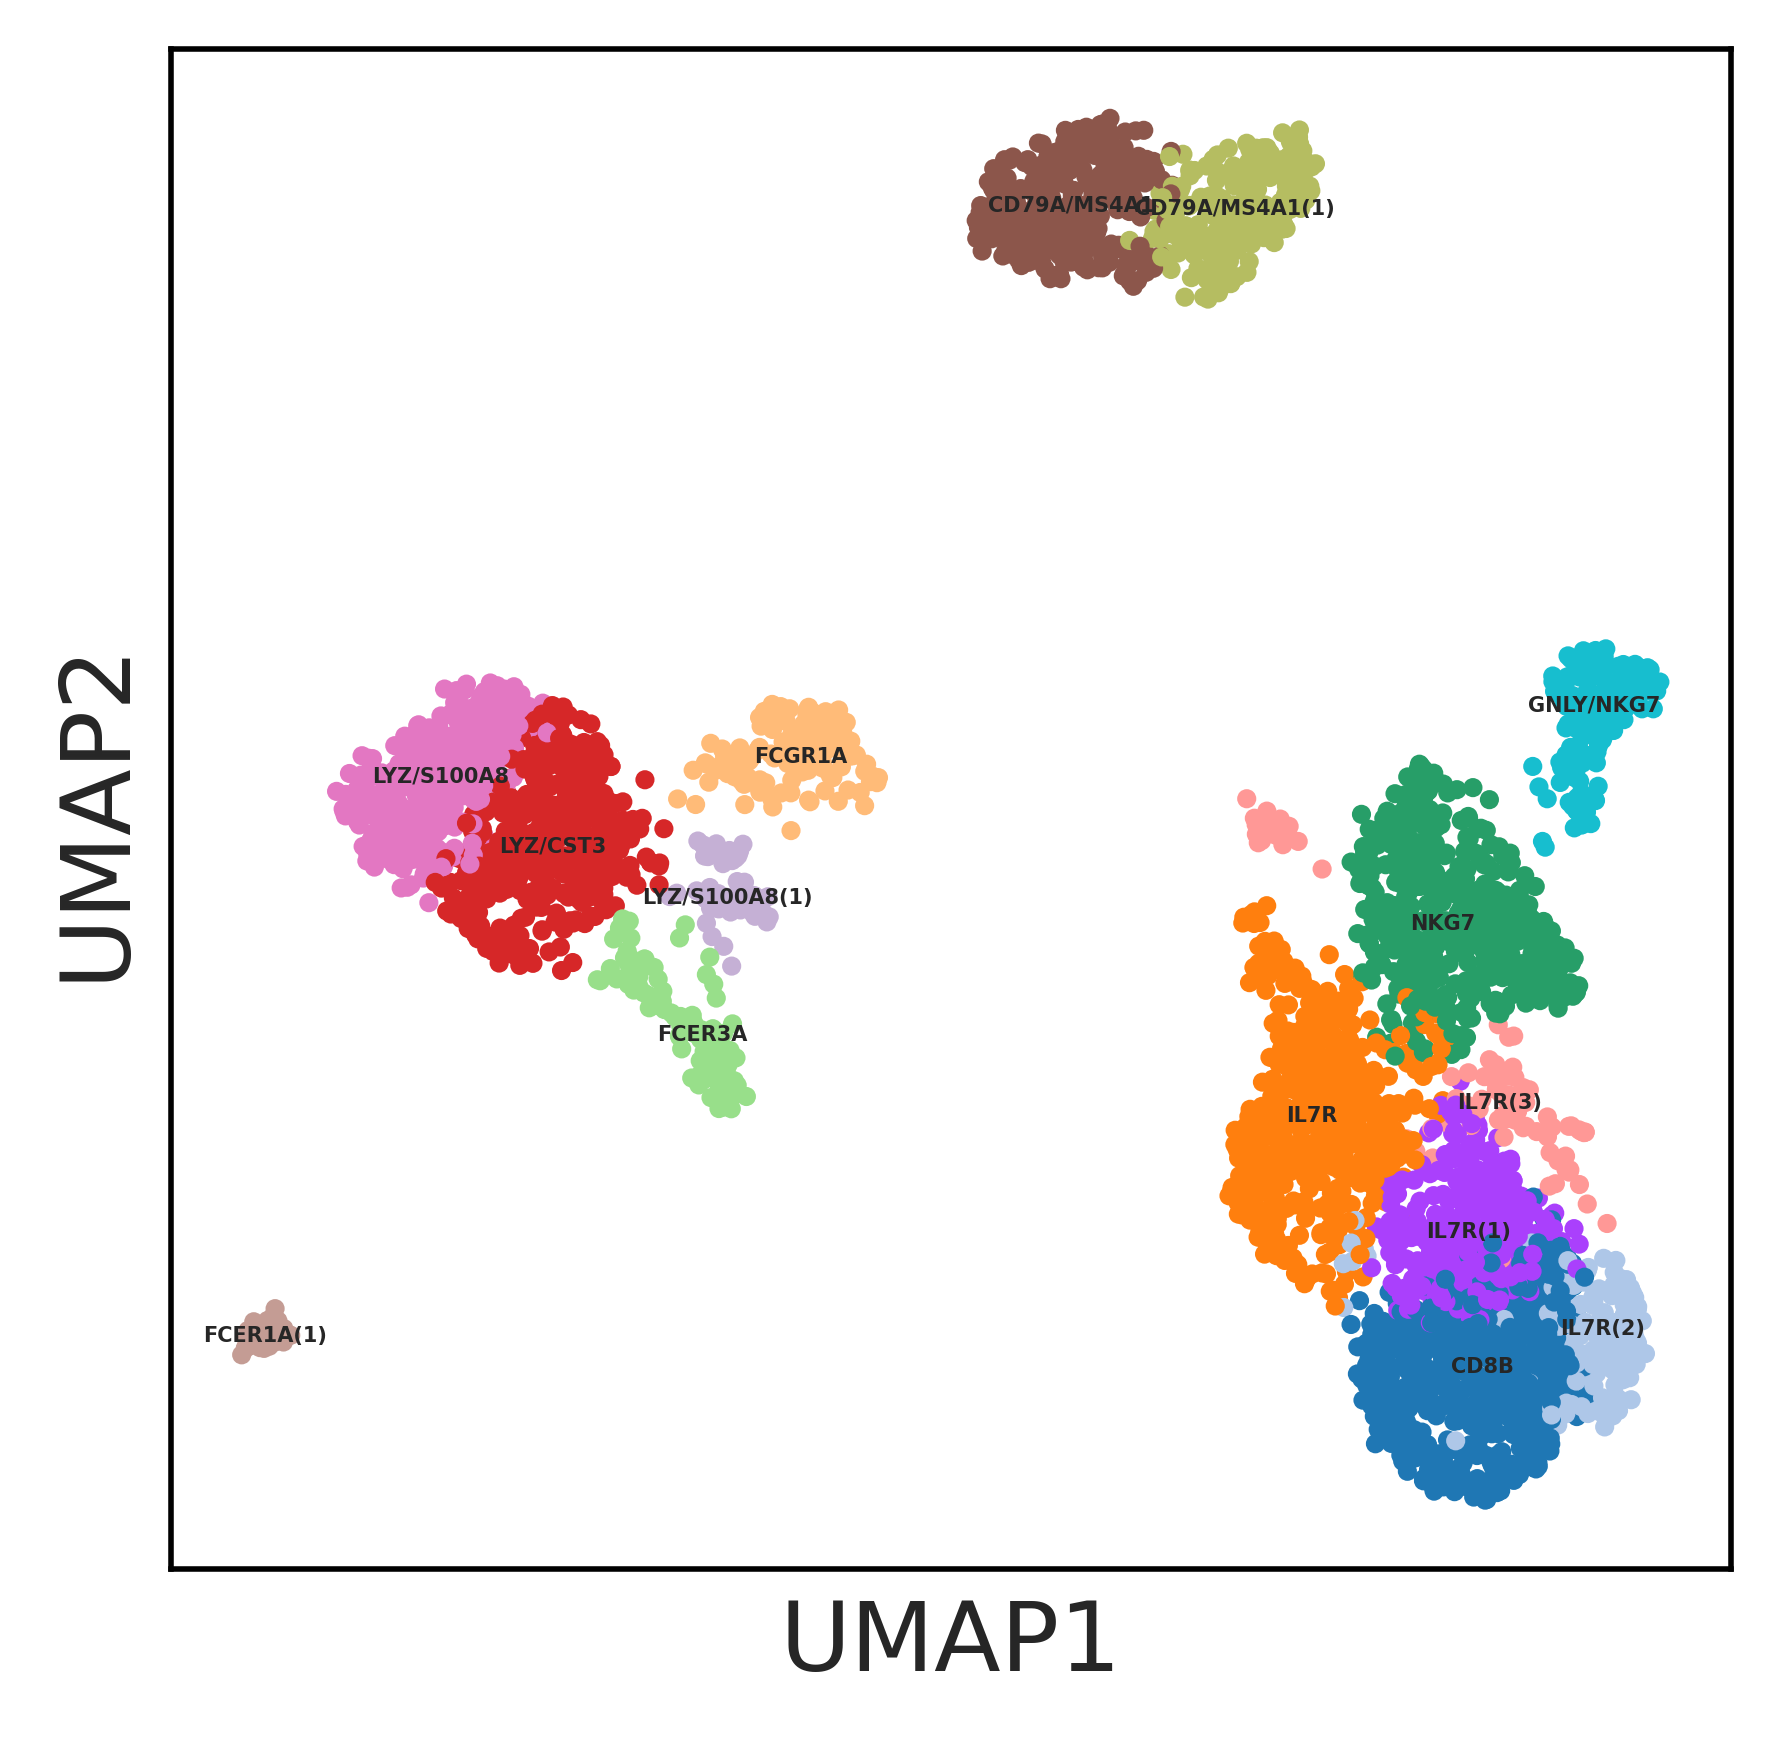

In [ ]:
# cluster_names are defined using the above information
# sometimes, the number of clusters can be different because of different versions
# of libraries and dependencies.
# the number of cluster names has to equal to the number of clusters calculated by leiden
cluster_names = ['CD8B',
                'IL7R',
                'NKG7',
                'LYZ/CST3',
                'IL7R(1)',
                'CD79A/MS4A1',
                'LYZ/S100A8',
                'CD79A/MS4A1(1)',
                'GNLY/NKG7',
                'IL7R(2)',
                'FCGR1A',
                'FCER3A',
                'IL7R(3)',
                'LYZ/S100A8(1)',
                'FCER1A(1)'
                ]

adata.rename_categories('leiden', cluster_names)

sc.settings.set_figure_params(dpi=250)
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', legend_fontsize=3)

In this map, we can see **B lymphocytes** with marker CD79A and MS4A1. There are also **macrophages** with LYZ, FCGR1A and FCGR3A. Additionaly, there are **T lymphocytes** with IL7R and CD8B. Close to this cluster, there are some **NK cells** with NKG7.

Similar to why we do normalization, regressing out the library size is to remove an uninteresting source of variation. Notice my Umap is not significantly different from the one got from part 2. This is because I removed some highly variarable genes in part 2. 